In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing and cleaning the data

### Importing the data set

In [3]:
#make sure that all files are on the same folder
data = pd.read_csv('books.csv')

In [4]:
data

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,6,11870085,11870085,16827462,226,525478817,9.780525e+12,John Green,2012.0,The Fault in Our Stars,...,2346404,2478609,140739,47994,92723,327550,698471,1311871,https://images.gr-assets.com/books/1360206420m...,https://images.gr-assets.com/books/1360206420s...
4,12,13335037,13335037,13155899,210,62024035,9.780062e+12,Veronica Roth,2011.0,Divergent,...,1903563,2216814,101023,36315,82870,310297,673028,1114304,https://images.gr-assets.com/books/1328559506m...,https://images.gr-assets.com/books/1328559506s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1349,9925,86737,86737,3877968,52,1582349177,9.781582e+12,Mary Hoffman,2002.0,City of Masks,...,12048,13385,555,314,758,3154,4872,4287,https://images.gr-assets.com/books/1294870497m...,https://images.gr-assets.com/books/1294870497s...
1350,9937,13010211,13010211,18171867,22,1596435712,9.781596e+12,Caragh M. O'Brien,2012.0,Promised,...,11766,12884,1260,256,1098,3565,4392,3573,https://images.gr-assets.com/books/1330546217m...,https://images.gr-assets.com/books/1330546217s...
1351,9942,16074758,16074758,21869436,18,1442486597,9.781442e+12,"Abigail Haas, Abby McDonald",2013.0,Dangerous Girls,...,10439,12970,2631,203,553,2029,4567,5618,https://images.gr-assets.com/books/1356513050m...,https://images.gr-assets.com/books/1356513050s...
1352,9947,21393526,21393526,40690062,19,62320521,9.780062e+12,Maria Dahvana Headley,2015.0,Magonia,...,12510,13652,2910,577,1440,3881,4772,2982,https://images.gr-assets.com/books/1413479866m...,https://images.gr-assets.com/books/1413479866s...


### Pre processing the data and cleaning

In [5]:
#cleaning the data by selecting the columns that we only need
col= ['original_title','title','authors','original_publication_year','average_rating','ratings_count',
    'work_ratings_count','ratings_1','ratings_2',
      'ratings_3','ratings_4','ratings_5']
# Create a new DataFrame with only the relevant columns
harry_potter_df = data[col]

# Filter Harry Potter books written by J.K. Rowling
jkr_books = harry_potter_df[harry_potter_df['authors'].str.contains('J.K. Rowling')]

# Filter titles containing 'Harry Potter and'
hp_books = jkr_books[jkr_books['title'].str.contains('Harry Potter and')]

In [6]:
hp_books

,original_title,title,authors,original_publication_year,average_rating,ratings_count,work_ratings_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5
1,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,"J.K. Rowling, Mary GrandPré",1997.0,4.44,4602479,4800065,75504,101676,455024,1156318,3011543
6,Harry Potter and the Prisoner of Azkaban,Harry Potter and the Prisoner of Azkaban (Harr...,"J.K. Rowling, Mary GrandPré, Rufus Beck",1999.0,4.53,1832823,1969375,6716,20413,166129,509447,1266670
8,Harry Potter and the Order of the Phoenix,Harry Potter and the Order of the Phoenix (Har...,"J.K. Rowling, Mary GrandPré",2003.0,4.46,1735368,1840548,9528,31577,180210,494427,1124806
9,Harry Potter and the Chamber of Secrets,Harry Potter and the Chamber of Secrets (Harry...,"J.K. Rowling, Mary GrandPré",1998.0,4.37,1779331,1906199,8253,42251,242345,548266,1065084
10,Harry Potter and the Goblet of Fire,Harry Potter and the Goblet of Fire (Harry Pot...,"J.K. Rowling, Mary GrandPré",2000.0,4.53,1753043,1868642,6676,20210,151785,494926,1195045
11,Harry Potter and the Deathly Hallows,Harry Potter and the Deathly Hallows (Harry Po...,"J.K. Rowling, Mary GrandPré",2007.0,4.61,1746574,1847395,9363,22245,113646,383914,1318227
12,Harry Potter and the Half-Blood Prince,Harry Potter and the Half-Blood Prince (Harry ...,"J.K. Rowling, Mary GrandPré",2005.0,4.54,1678823,1785676,7308,21516,136333,459028,1161491


# Analysis of the data set:

#### plotting the numbers of ratings for each book

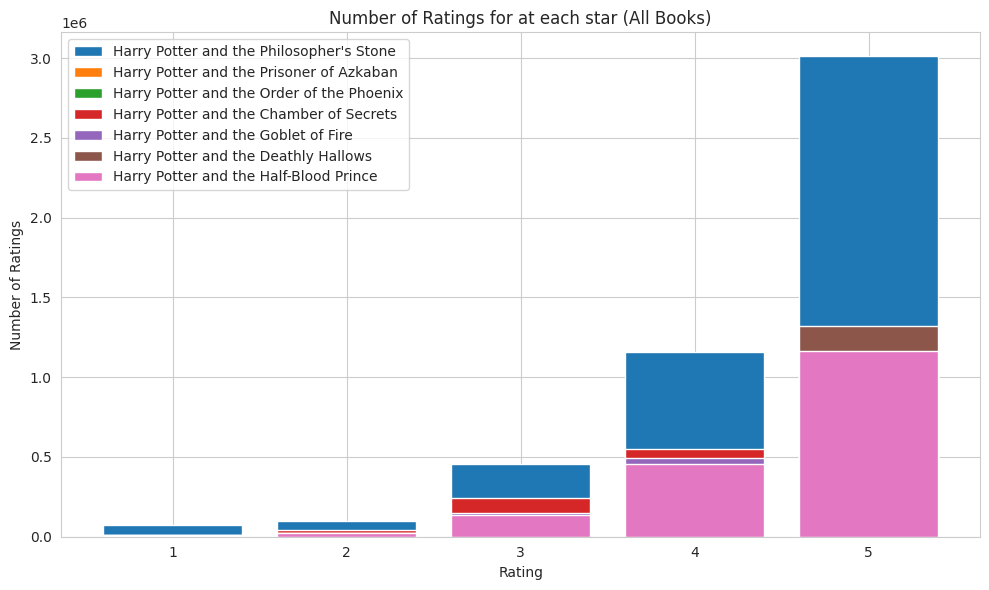

In [17]:
# using a costom color pallete for visibility
colors = plt.cm.tab10.colors

# Plot all books 
plt.figure(figsize=(10, 6))
for i, (_, book) in enumerate(hp_books.iterrows()):
    plt.bar(['1', '2', '3', '4', '5'],
            [book['ratings_1'], book['ratings_2'], book['ratings_3'], book['ratings_4'], book['ratings_5']],
            color=colors[i % len(colors)],  
            
            label=book['original_title'])

plt.xlabel('Rating')
plt.ylabel('Number of Ratings')
plt.title('Number of Ratings for at each star (All Books)')
plt.legend()
plt.tight_layout()
plt.show()


#### Finding the most rated book as it would be the most sold one

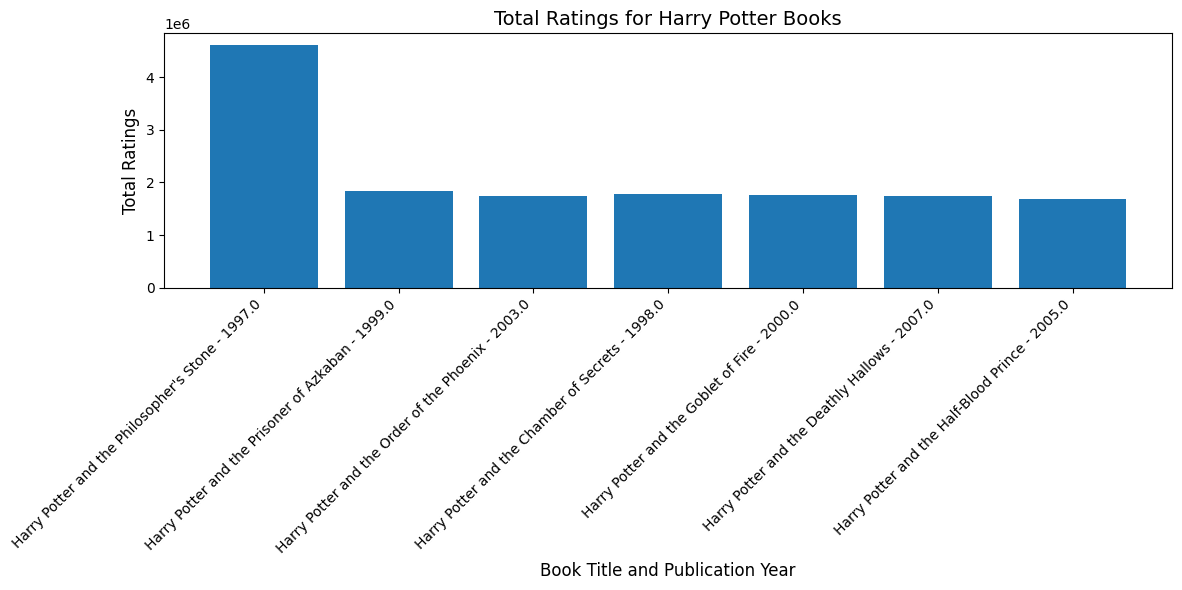

In [8]:
x_labels = hp_books['original_title'] + ' - ' + hp_books['original_publication_year'].astype(str)

# Plotting total ratings for each book
plt.figure(figsize=(12, 6))
plt.bar(x_labels, hp_books['ratings_count'])
plt.xlabel('Book Title and Publication Year', fontsize=12)
plt.ylabel('Total Ratings', fontsize=12)
plt.title('Total Ratings for Harry Potter Books', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#### Ratings relevant to the total number of ratings to find the most liked book

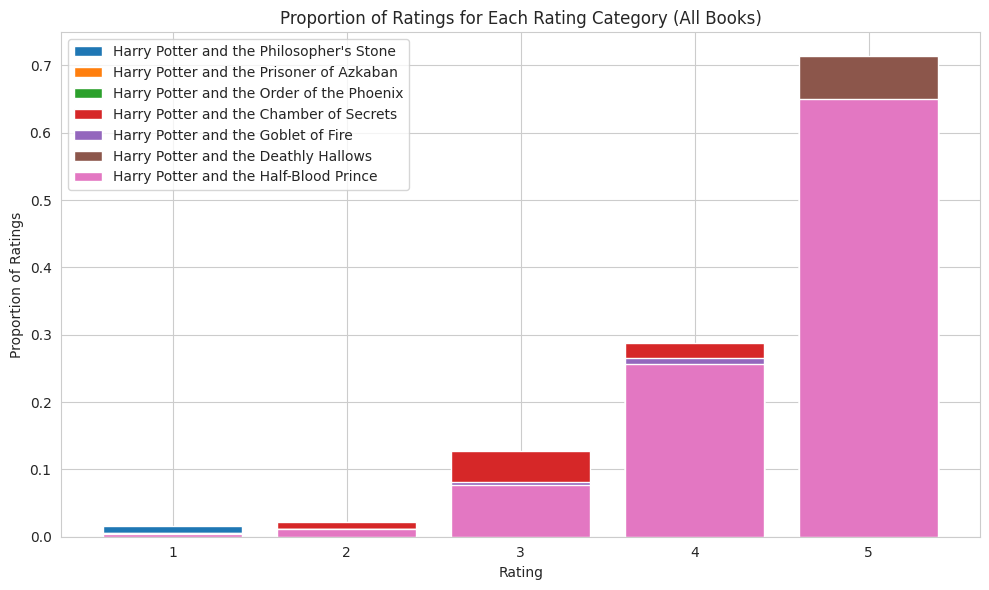

In [18]:
colors = plt.cm.tab10.colors

# Plot all books
plt.figure(figsize=(10, 6))
for i, (_, book) in enumerate(hp_books.iterrows()):
    total_ratings = book[['ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5']].sum()
    proportions = book[['ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5']] / total_ratings
    plt.bar(['1', '2', '3', '4', '5'],
            proportions,
            color=colors[i % len(colors)], 
            label=book['original_title'])

plt.xlabel('Rating')
plt.ylabel('Proportion of Ratings')
plt.title('Proportion of Ratings for Each Rating Category (All Books)')
plt.legend()
plt.tight_layout()
plt.show()

### Weighted average for each book

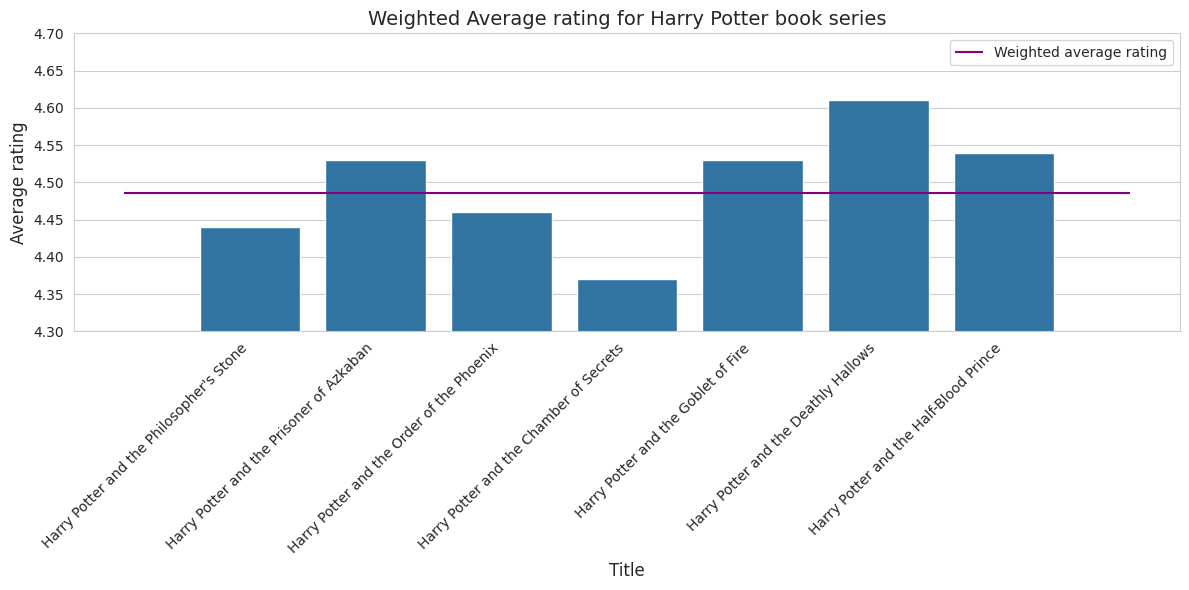

In [11]:
# Calculate weighted average rating
weighted_avg = (hp_books['average_rating'] * hp_books['ratings_count']).sum() / hp_books['ratings_count'].sum()

# Plotting
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x=hp_books['original_title'], y=hp_books['average_rating'])
plt.xlabel('Title', fontsize=12)
plt.ylabel('Average rating', fontsize=12)
plt.ylim((4.3, 4.7))  # Adjust the y-axis limits as needed
plt.hlines(weighted_avg, xmin=-1, xmax=len(hp_books), color='purple', label='Weighted average rating')
plt.title('Weighted Average rating for Harry Potter book series', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend()
plt.show()


/tmp/ipykernel_96/1393150977.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hp_books.loc[:, 'proportion_5_star_ratings'] = hp_books['ratings_5'] / hp_books['ratings_count']


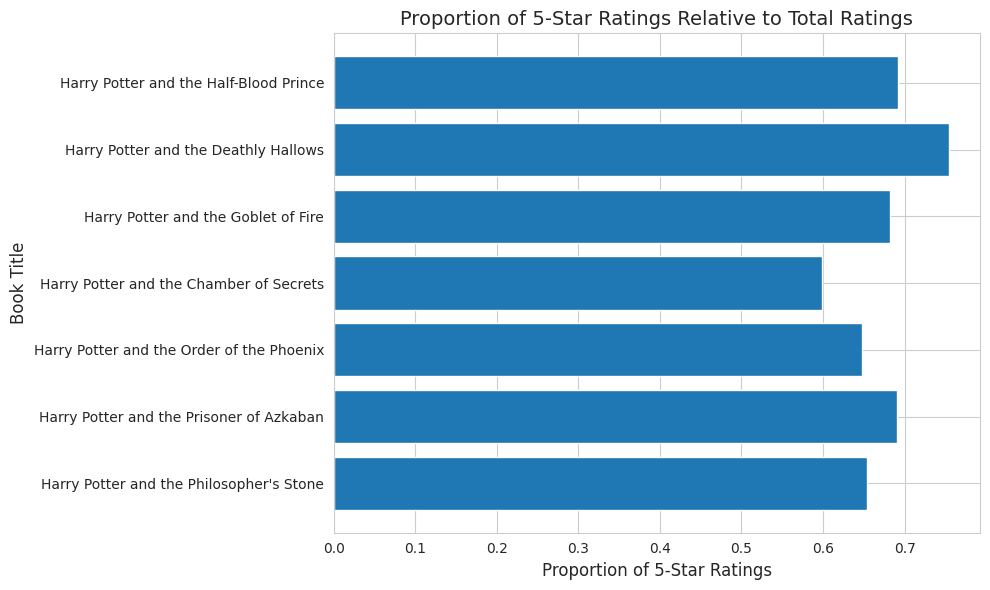

In [12]:
# Calculate proportion of 5-star ratings relative to total ratings for each book
# Calculate proportion of 5-star ratings relative to total ratings for each book
hp_books.loc[:, 'proportion_5_star_ratings'] = hp_books['ratings_5'] / hp_books['ratings_count']

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(hp_books['original_title'], hp_books['proportion_5_star_ratings'])
plt.xlabel('Proportion of 5-Star Ratings', fontsize=12)
plt.ylabel('Book Title', fontsize=12)
plt.title('Proportion of 5-Star Ratings Relative to Total Ratings', fontsize=14)
plt.tight_layout()
plt.show()

Harry potter and the deathly hallows has the highest 5-star rating and the highest average percentage compared to other books